In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('data/UpdatedResumeDataSet.csv')
df.head(10)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


# Prelaminary Preprocessing + EDA

(962, 2)
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64


<Axes: >

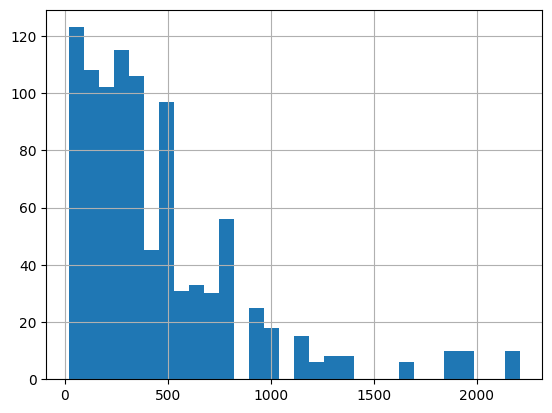

In [3]:
print(df.shape)
print(df['Category'].value_counts())
df['resume_length'] = df['Resume'].apply(lambda x: len(str(x).split()))
df['resume_length'].hist(bins=30)

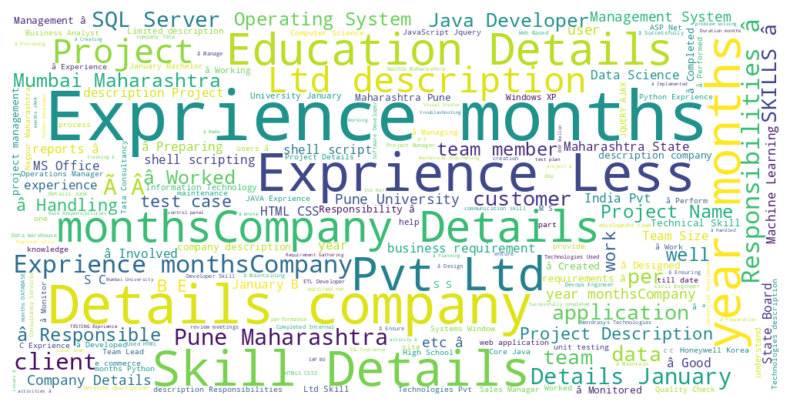

In [4]:
text = " ".join(df['Resume'].astype(str).tolist())
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [5]:
def clean_text(text):
    text = re.sub(r'\s+', ' ', str(text))
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text.strip()

In [6]:
df['cleaned_resume'] = df['Resume'].apply(clean_text)

In [ ]:
df.to_csv("data/cleaned_resume_data_v1.csv", index=False)

# Improved Preprocessing + EDA

In [8]:
df = df.drop_duplicates(subset='Resume')

df = df.dropna(subset=['Resume'])

df = df[df['Resume'].str.len() > 50]

print("After cleaning:", df.shape)

# initial len = 962
removed = 962 - len(df)
print(f"Removed {removed} invalid or duplicate resumes.")

After cleaning: (166, 4)
Removed 796 invalid or duplicate resumes.


In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_resume(text):
    text = re.sub(r'<[^>]+>', ' ', text)   # remove html tags               
    text = re.sub(r'http\S+', ' ', text)   # remove URLs             
    text = re.sub(r'[^a-zA-Z#\+\.\s]', ' ', text)   # keep +, #, . for skills like "C++" or "Node.js"
    text = text.lower()
    tokens = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    cleaned = ' '.join(tokens)
    return cleaned.strip()


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/samwise/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/samwise/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
df['cleaned_resume'] = df['Resume'].apply(clean_resume)

In [11]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 166 entries, 0 to 898
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        166 non-null    object
 1   Resume          166 non-null    object
 2   resume_length   166 non-null    int64 
 3   cleaned_resume  166 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


,Category,Resume,resume_length,cleaned_resume
count,166,166,166.000000,166
unique,25,166,NaN,166
top,Java Developer,Skills * Programming Languages: Python (pandas...,NaN,skill programming language python panda numpy ...
freq,13,1,NaN,1
mean,NaN,NaN,424.771084,NaN
std,NaN,NaN,380.604490,NaN
min,NaN,NaN,19.000000,NaN
25%,NaN,NaN,161.250000,NaN
50%,NaN,NaN,330.000000,NaN
75%,NaN,NaN,571.500000,NaN


In [12]:
df['text_length'] = df['cleaned_resume'].apply(lambda x: len(x.split()))
df['text_length'].describe()

count     166.000000
mean      302.469880
std       262.972857
min        15.000000
25%       115.000000
50%       242.500000
75%       409.000000
max      1559.000000
Name: text_length, dtype: float64

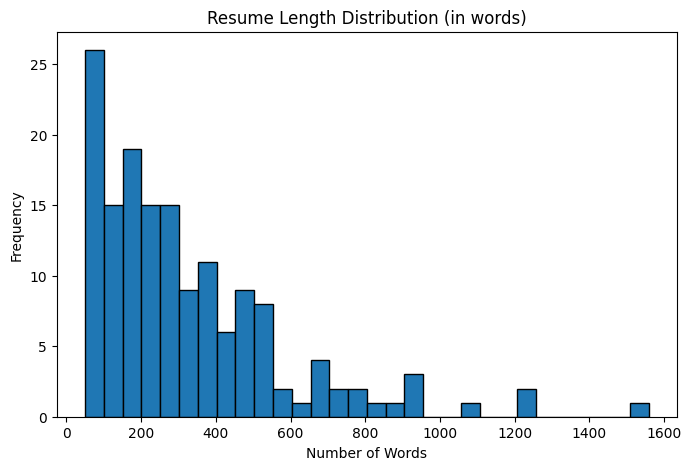

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['text_length'], bins=30, edgecolor='black')
plt.title('Resume Length Distribution (in words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


In [16]:
# Drop resumes that have fewer than 50 words
df = df[df['text_length'] >= 100].reset_index(drop=True)

print(f"Remaining resumes: {len(df)}")

Remaining resumes: 129


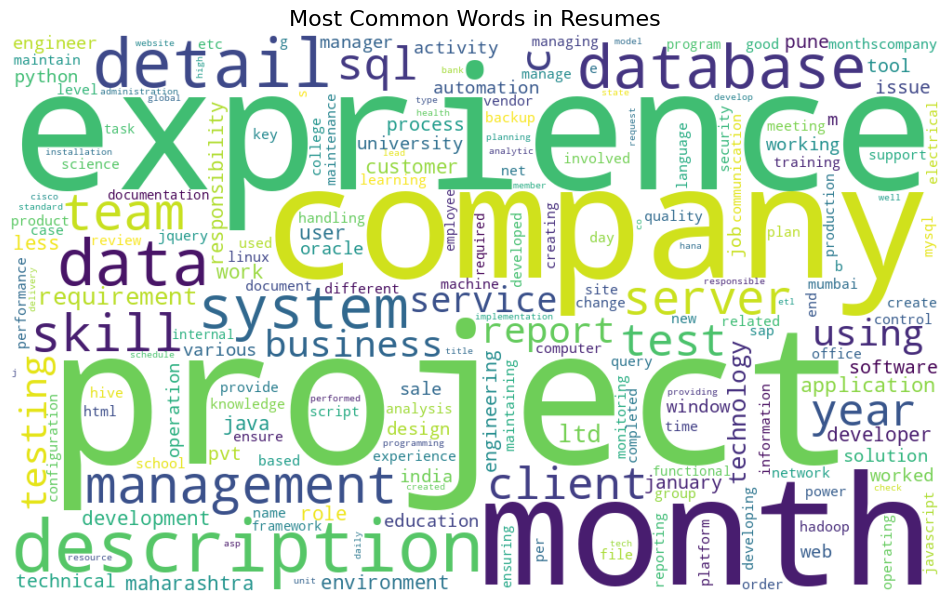

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all resume text into one string
text = " ".join(df['cleaned_resume'])

# Create and display the word cloud
wordcloud = WordCloud(width=1000, height=600,
                      background_color='white',
                      max_words=200,
                      collocations=False).generate(text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Resumes", fontsize=16)
plt.show()

## Job Category Simplification

In [ ]:
# Count how many resumes per category
category_counts = df['Category'].value_counts()

print(category_counts)

Category
Java Developer               11
Database                     11
Data Science                  8
DevOps Engineer               7
Hadoop                        7
Business Analyst              6
SAP Developer                 6
Automation Testing            6
Network Security Engineer     5
Blockchain                    5
DotNet Developer              5
Testing                       5
ETL Developer                 5
Mechanical Engineer           4
Sales                         4
Health and fitness            4
Civil Engineer                4
Operations Manager            4
Python Developer              4
Arts                          3
Web Designing                 3
HR                            3
Advocate                      3
Electrical Engineering        3
PMO                           3
Name: count, dtype: int64


In [21]:
keep_categories = [
    'Data Science', 'Data Analyst', 'Python Developer', 'Java Developer',
    'Database', 'DevOps Engineer', 'ETL Developer', 'Hadoop', 'Software Developer',
    'Web Designing', 'Automation Testing', 'Business Analyst', 'Blockchain',
    'Network Security Engineer', 'SAP Developer'
]

df = df[df['Category'].isin(keep_categories)].reset_index(drop=True)
print(f"Remaining resumes: {len(df)}")
df['Category'].value_counts()

Remaining resumes: 84


Category
Java Developer               11
Database                     11
Data Science                  8
DevOps Engineer               7
Hadoop                        7
Business Analyst              6
SAP Developer                 6
Automation Testing            6
ETL Developer                 5
Blockchain                    5
Network Security Engineer     5
Python Developer              4
Web Designing                 3
Name: count, dtype: int64

## Removing Custom Stopwords

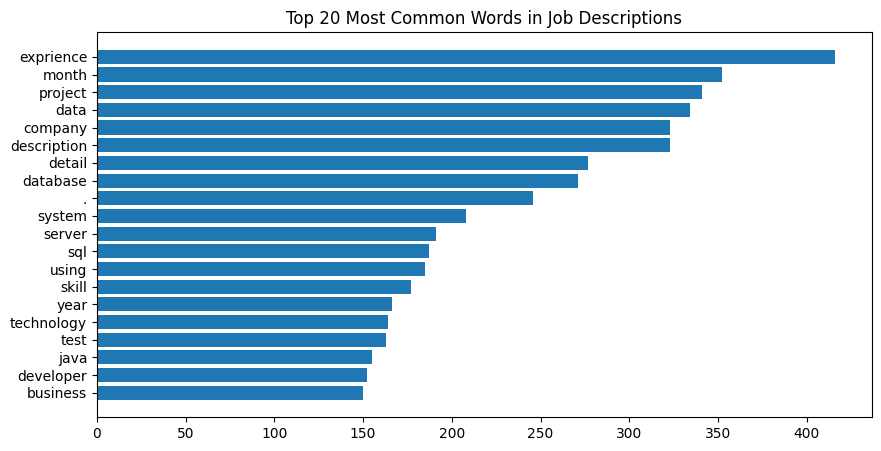

In [22]:
from collections import Counter

all_words = " ".join(df["cleaned_resume"]).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

words, counts = zip(*common_words)
plt.figure(figsize=(10,5))
plt.barh(words, counts)
plt.title("Top 20 Most Common Words in Job Descriptions")
plt.gca().invert_yaxis()
plt.show()

In [39]:
examples = [text for text in df['cleaned_resume'] if '.' in text][:10]
for i, e in enumerate(examples, 1):
    print(f"{i}. ...{e[:200]}...")

1. ...programming language python panda numpy scipy scikit learn matplotlib sql java javascript jquery. machine learning regression svm na bayes knn random forest decision tree boosting technique cluster an...
2. ...education may may b.e uit rgpv data scientist data scientist matelabs python statsmodels aws machine learning sklearn scipy kera monthscompany matelabs ml platform business professional dummy enthusia...
3. ...area interest deep learning control system design programming python electric machinery web development analytics technical activity q hindustan aeronautics limited bangalore week guidance mr. satish ...
4. ...r python sap hana tableau sap hana sql sap hana pal sql sap lumira c# linear programming data modelling advance analytics scm analytics retail analytics social medium analytics nlp education january j...
5. ...python tableau data visualization r studio machine learning statistic iabac certified data scientist versatile + managing business data science consulting

In [40]:
import re

def clean_periods(text):
    # keep dots between alphanumeric chars (e.g., a.b or .net)
    text = re.sub(r'(?<!\w)\.(?!\w)', ' ', text)  # replace isolated dots with space
    return text

df['cleaned_resume'] = df['cleaned_resume'].apply(clean_periods)

In [43]:
# See how "less" is used in context
import re

samples = []
for text in df['cleaned_resume']:
    matches = re.findall(r'\b.{0,30}\bless\b.{0,30}', text)
    samples.extend(matches)

for i, s in enumerate(samples[:15]):  # show first 15 examples
    print(f"{i+1}. ...{s.strip()}...")

In [45]:
custom_stopwords = [
    'experience', 'exprience', 'month', 'project', 'company', 'description', 'detail',
    'worked', 'responsible', 'responsibility', 'responsibilities',
    'team', 'task', 'year', 'based', 'work', 'developed', 
    'technology', 'skill', 'skills', 'requirement', 'requirements',
    'maharashtra', 'using', 'environment', 'less', 'role', 'roles', 'ltd'
]

stop_words = set(stopwords.words('english')).union(custom_stopwords)

df['cleaned_resume'] = df['cleaned_resume'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)

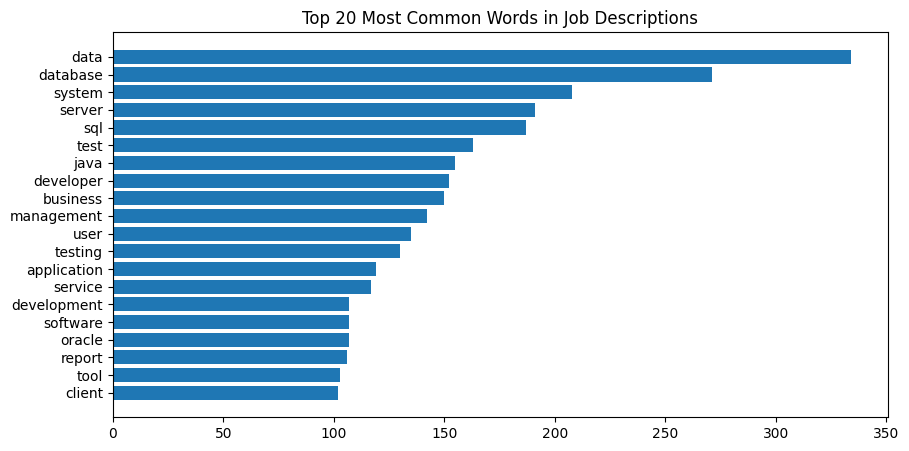

In [46]:
from collections import Counter

all_words = " ".join(df["cleaned_resume"]).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

words, counts = zip(*common_words)
plt.figure(figsize=(10,5))
plt.barh(words, counts)
plt.title("Top 20 Most Common Words in Job Descriptions")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from collections import Counter
import re

# join all resumes into one big string
all_text = " ".join(df['cleaned_resume'])

# tokenize (simple split on spaces)
words = re.findall(r'\b[a-zA-Z]{2,}\b', all_text)  # keep only alphabetic words, length ≥ 2

# count word frequencies
word_freq = Counter(words)

# get top 20
top_20 = word_freq.most_common(20)

# print neatly
for word, freq in top_20:
    print(f"{word:<15} {freq}")

data            351
database        292
system          224
server          199
sql             198
test            163
java            162
developer       158
testing         155
business        153
management      152
user            135
application     132
service         117
report          115
development     113
oracle          112
tool            108
software        108
python          107


In [49]:
df.to_csv('data/cleaned_resume_data_final.csv', index=False)